# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

import numpy as np
import datetime
from pandas_datareader import data, wb

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

------------

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
# Bank of America
BAC = data.get_data_yahoo('BAC', start, end)

# Citigroup
C = data.get_data_yahoo('C', start, end)

# Goldman Sachs
GS = data.get_data_yahoo('GS', start, end)

# JPMorgan Chase
JPM = data.get_data_yahoo('JPM', start, end)

# Morgan Stanley
MS = data.get_data_yahoo('MS', start, end)

# Wells Fargo
WFC = data.get_data_yahoo('WFC', start, end)

In [6]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.968796
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.916302
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.938789


In [7]:
BAC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
High         2517 non-null float64
Low          2517 non-null float64
Open         2517 non-null float64
Close        2517 non-null float64
Volume       2517 non-null float64
Adj Close    2517 non-null float64
dtypes: float64(6)
memory usage: 137.6 KB


In [8]:
# Drop unwanted columns
C = C.drop('Adj Close', axis=1)
GS = GS.drop('Adj Close', axis=1)
BAC = BAC.drop('Adj Close', axis=1)
JPM = JPM.drop('Adj Close', axis=1)
MS = MS.drop('Adj Close', axis=1)
WFC = WFC.drop('Adj Close', axis=1)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [10]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [11]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
(BAC, High)      2517 non-null float64
(BAC, Low)       2517 non-null float64
(BAC, Open)      2517 non-null float64
(BAC, Close)     2517 non-null float64
(BAC, Volume)    2517 non-null float64
(C, High)        2517 non-null float64
(C, Low)         2517 non-null float64
(C, Open)        2517 non-null float64
(C, Close)       2517 non-null float64
(C, Volume)      2517 non-null float64
(GS, High)       2517 non-null float64
(GS, Low)        2517 non-null float64
(GS, Open)       2517 non-null float64
(GS, Close)      2517 non-null float64
(GS, Volume)     2517 non-null float64
(JPM, High)      2517 non-null float64
(JPM, Low)       2517 non-null float64
(JPM, Open)      2517 non-null float64
(JPM, Close)     2517 non-null float64
(JPM, Volume)    2517 non-null float64
(MS, High)       2517 non-null float64
(MS, Low)        2517 non-null float64
(MS, Open)       

** Set the column name levels (this is filled out for you):**

In [13]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [14]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker           C                                                 ...  \
Stock Info         High         Low        Open       Close     Volume  ...   
Date                                                                    ...   
2006-01-03   493.799988  481.100006  490.000000  492.899994  1537600.0  ...   
2006-01-04   491.000000  483.500000  488.600006  483.799988  1870900.0  ...   
2006-01-05   487.799988  484.000000  484.399994  486.200012  1143100.0  ...   
2006-01-06   489.000000  482.000000  488.799988  486.200012  1370200.0  ...   
2006-01-09   487.399994  483.000000  486.000000  483.899994  1680700.0  ...   

Bank Ticker         MS                                                    WFC  \
Stock Info        High        Low       Open      Close     Volume       High   
Date                                                                            
2006-01-03   58.490002  56.740002  57.169998  58.310001  5377000.0  31.975000   
2006-01-04   59.279999  58.349998  58.700001  58.349998  7977800.0  31.820000   
2006-01-05   58.590000  58.020000  58.549999  58.509998  5778000.0  31.555000   
2006-01-06   58.849998  58.049999  58.770000  58.570000  6889800.0  31.775000   
2006-01-09   59.290001  58.619999  58.630001  59.189999  4144500.0  31.825001   

Bank Ticker                                               
Stock Info         Low       Open      Close      Volume  
Date                                                      
2006-01-03   31.195000  31.600000  31.900000  11016400.0  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [15]:
bank_stocks.xs('Close', axis=1, level='Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


In [18]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max(axis=0)

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [19]:
bank_stocks.xs('Close', axis=1, level='Stock Info').idxmax(axis=0)

Bank Ticker
BAC   2006-11-16
C     2006-12-27
GS    2007-10-31
JPM   2015-07-22
MS    2007-06-14
WFC   2015-07-22
dtype: datetime64[ns]

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [20]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [24]:
bank_stocks['BAC']['Close'].pct_change().head()  # test .pct_change() method

Date
2006-01-03         NaN
2006-01-04   -0.010620
2006-01-05    0.001288
2006-01-06   -0.001501
2006-01-09    0.000644
Name: Close, dtype: float64

In [22]:
for bank in tickers:
    returns[(bank+' Return')] = bank_stocks[bank]['Close'].pct_change()
    

In [23]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
returns.describe()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.000258,-0.000157,0.000452,0.000575,0.000423,0.000657
std,0.036647,0.038672,0.025390,0.027667,0.037819,0.030238
min,-0.289694,-0.390244,-0.189596,-0.207274,-0.258929,-0.238223
25%,-0.011367,-0.011182,-0.010185,-0.009946,-0.012397,-0.008696
50%,0.000000,-0.000210,0.000368,0.000164,0.000254,0.000000
75%,0.010751,0.010751,0.011004,0.010022,0.012504,0.008844
max,0.352691,0.578249,0.264678,0.250967,0.869835,0.327645


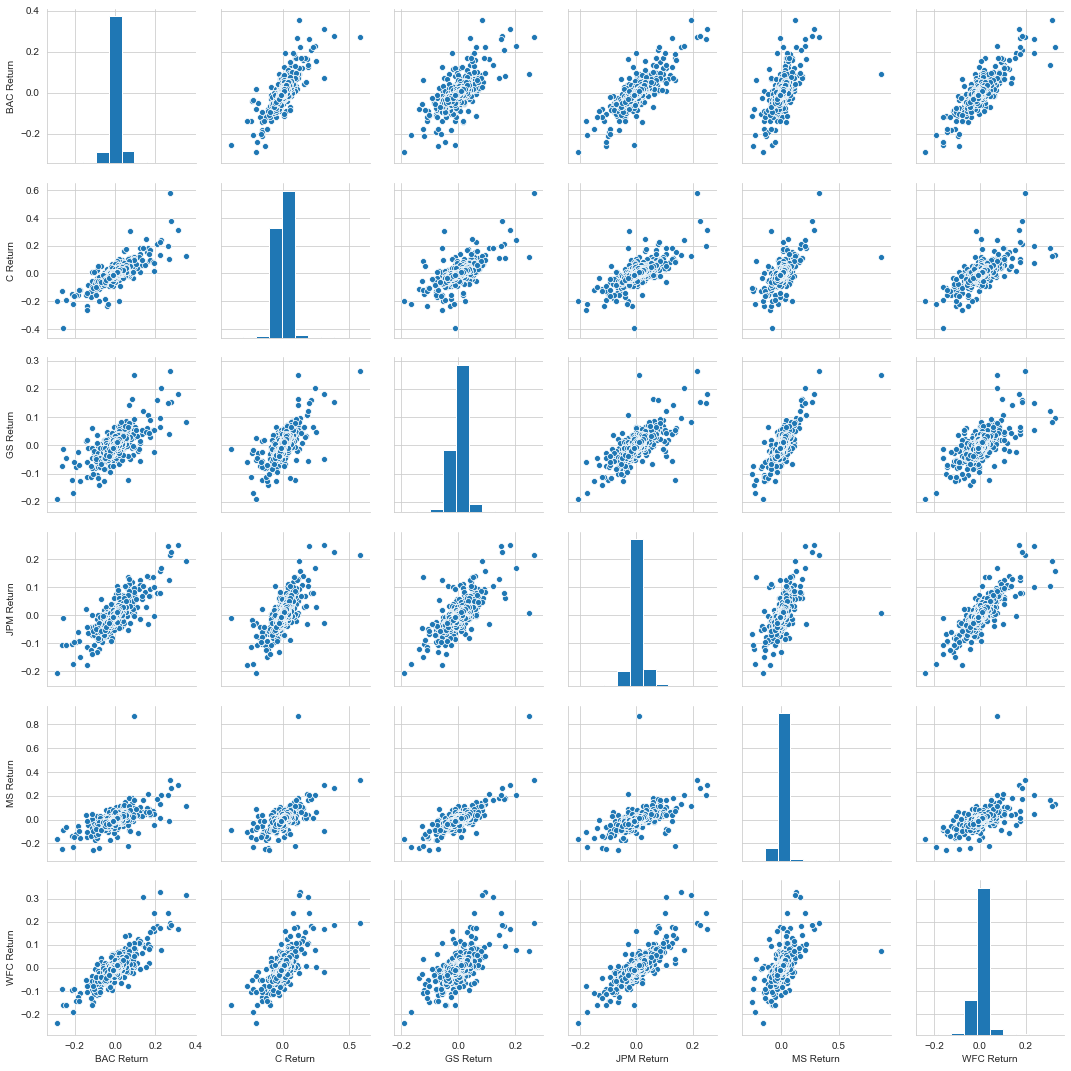

In [34]:
sns.set_style('whitegrid')
sns.pairplot(returns.iloc[1:])    # skip the first row of NA values in returns

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [37]:
# Worst single day drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [38]:
# Best single day return
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [40]:
returns.std()    # Citigroup is the riskiest 

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [44]:
# only for year 2015, the banks have similar risk profiles
returns.loc['2015-01-01':'2016-01-01'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [46]:
returns.loc['2015-01-01':'2016-01-01', 'MS Return'].head()

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
Name: MS Return, dtype: float64

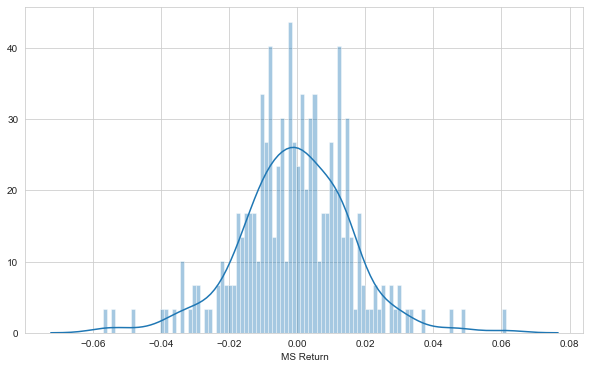

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(returns.loc['2015-01-01':'2016-01-01', 'MS Return'], bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

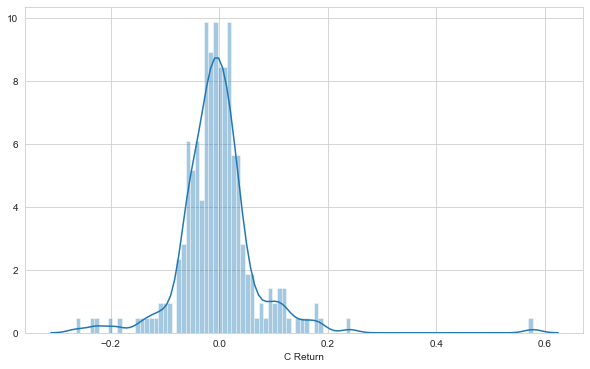

In [57]:
plt.figure(figsize=(10,6))
sns.distplot(returns.loc['2008-01-01':'2009-01-01', 'C Return'], bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [59]:
bank_stocks.head(3)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   

Bank Ticker           C                                                 ...  \
Stock Info         High         Low        Open       Close     Volume  ...   
Date                                                                    ...   
2006-01-03   493.799988  481.100006  490.000000  492.899994  1537600.0  ...   
2006-01-04   491.000000  483.500000  488.600006  483.799988  1870900.0  ...   
2006-01-05   487.799988  484.000000  484.399994  486.200012  1143100.0  ...   

Bank Ticker         MS                                                 WFC  \
Stock Info        High        Low       Open      Close     Volume    High   
Date                                                                         
2006-01-03   58.490002  56.740002  57.169998  58.310001  5377000.0  31.975   
2006-01-04   59.279999  58.349998  58.700001  58.349998  7977800.0  31.820   
2006-01-05   58.590000  58.020000  58.549999  58.509998  5778000.0  31.555   

Bank Ticker                                               
Stock Info         Low       Open      Close      Volume  
Date                                                      
2006-01-03   31.195000  31.600000  31.900000  11016400.0  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  

[3 rows x 30 columns]

Text(0, 0.5, 'Stock Price')

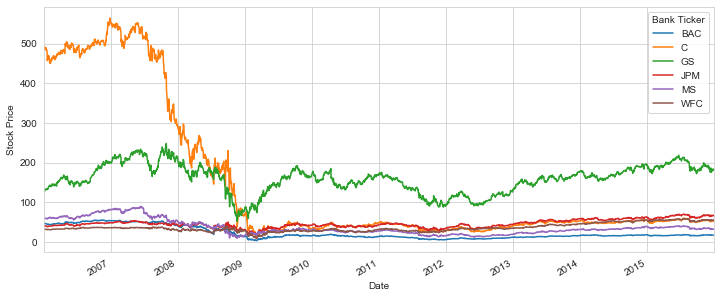

In [67]:
# Plot line chart using for loop
for tick in tickers:
    bank_stocks[tick]['Close'].plot.line(label=tick, figsize=(12,5))
plt.legend(title='Bank Ticker')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

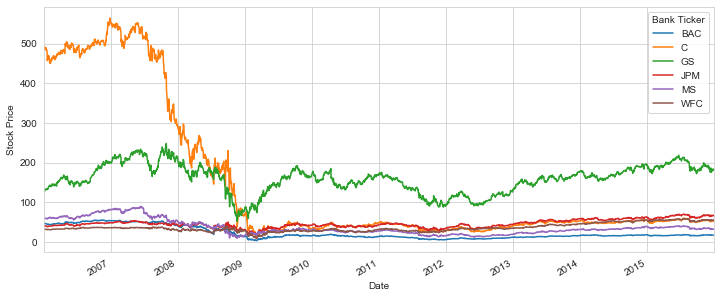

In [68]:
# Plot line chart using .xs()
bank_stocks.xs('Close', axis=1, level='Stock Info').plot.line(figsize=(12,5))
plt.ylabel('Stock Price')

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [69]:
bank_stocks.head(3)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   

Bank Ticker           C                                                 ...  \
Stock Info         High         Low        Open       Close     Volume  ...   
Date                                                                    ...   
2006-01-03   493.799988  481.100006  490.000000  492.899994  1537600.0  ...   
2006-01-04   491.000000  483.500000  488.600006  483.799988  1870900.0  ...   
2006-01-05   487.799988  484.000000  484.399994  486.200012  1143100.0  ...   

Bank Ticker         MS                                                 WFC  \
Stock Info        High        Low       Open      Close     Volume    High   
Date                                                                         
2006-01-03   58.490002  56.740002  57.169998  58.310001  5377000.0  31.975   
2006-01-04   59.279999  58.349998  58.700001  58.349998  7977800.0  31.820   
2006-01-05   58.590000  58.020000  58.549999  58.509998  5778000.0  31.555   

Bank Ticker                                               
Stock Info         Low       Open      Close      Volume  
Date                                                      
2006-01-03   31.195000  31.600000  31.900000  11016400.0  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  

[3 rows x 30 columns]

In [74]:
# test out rolling 30 day average calcuation
bank_stocks.loc['2008-01-01':'2009-01-01']['BAC']['Close'].rolling(30).mean()

Date
2008-01-02          NaN
2008-01-03          NaN
2008-01-04          NaN
2008-01-07          NaN
2008-01-08          NaN
                ...    
2008-12-24    14.738667
2008-12-26    14.617333
2008-12-29    14.478667
2008-12-30    14.372667
2008-12-31    14.341000
Name: Close, Length: 253, dtype: float64

Text(0, 0.5, 'Stock Price')

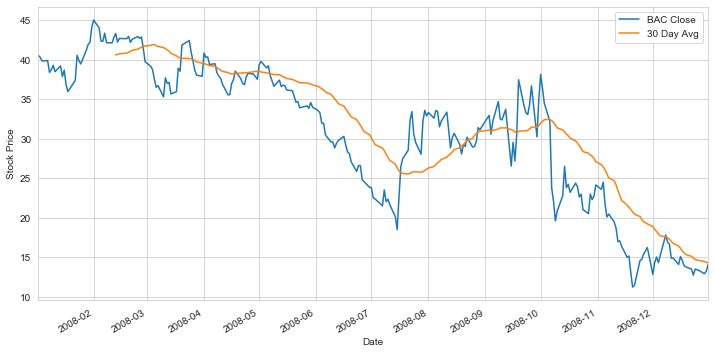

In [75]:
bank_stocks.loc['2008-01-01':'2009-01-01']['BAC']['Close'].plot.line(label='BAC Close',figsize=(12,6))
bank_stocks.loc['2008-01-01':'2009-01-01']['BAC']['Close'].rolling(30).mean().plot.line(label='30 Day Avg')
plt.legend()
plt.ylabel('Stock Price')

** Create a heatmap of the correlation between the stocks Close Price.**

In [76]:
bank_stocks.xs('Close', axis=1, level=1).corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


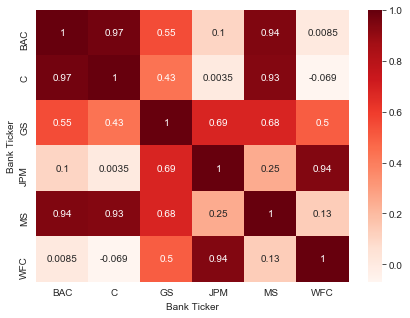

In [82]:
plt.figure(figsize=(7,5))
sns.heatmap(bank_stocks.xs('Close', axis=1, level=1).corr(), annot=True, cmap='Reds')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

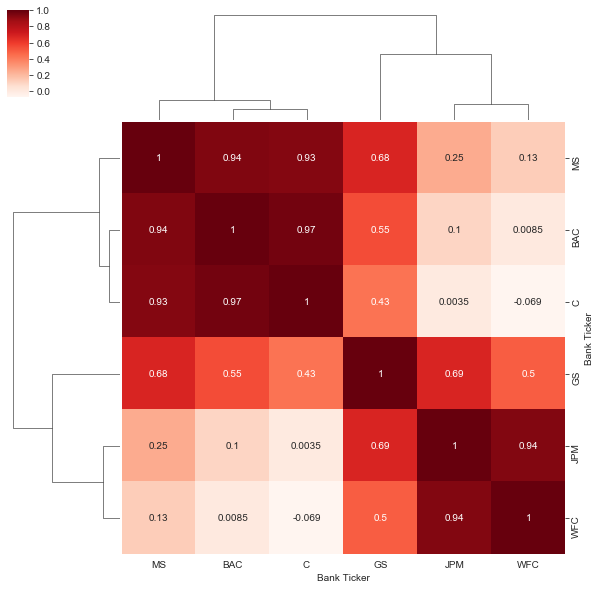

In [83]:
sns.clustermap(bank_stocks.xs('Close', axis=1, level=1).corr(), annot=True, cmap='Reds')